<a target="_blank" href="https://colab.research.google.com/github/Edwina-Yeo/LTCC-Math-Bio/blob/main/SIR-matched-asymptotics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# **Separation of timescales in biology - method of matched asymptotic expansions**

In this notebook we will evalutate the solution of the SIR model derived using matched asymptotics for the case when $R_0\gg1$ and $i(t=0)\ll1$, namely when the infection rate is much larger than the recovery rate and the iitial number of infected people is small.

**Resources**
This notebook is uses the solution presented in the following paper:

*  Gregory Kozyreff, Asymptotic solutions of the SIR and SEIR models well above the epidemic threshold, IMA Journal of Applied Mathematics, Volume 87, Issue 4, August 2022, Pages 521–536, https://doi.org/10.1093/imamat/hxac015


# Full Model

# 1.   $\frac{ds}{dt}=-\beta i s$
# 2.   $\frac{di}{dt}=\beta i s-\gamma i$
#3.   $\frac{dr}{dt}=\gamma i$
 with initial conditions $r(0)=0$, $i(0)=a\ll1$, $s(0)=1-a$

**Reduced model for $r(t)$ only**

# 1.   $\frac{dr}{dt}=\gamma(1-r-(1-a)r^{-R_0r})$

In the code below we plot the late time solution, the initial solution, the composite solution and compare to the full numerical solution.

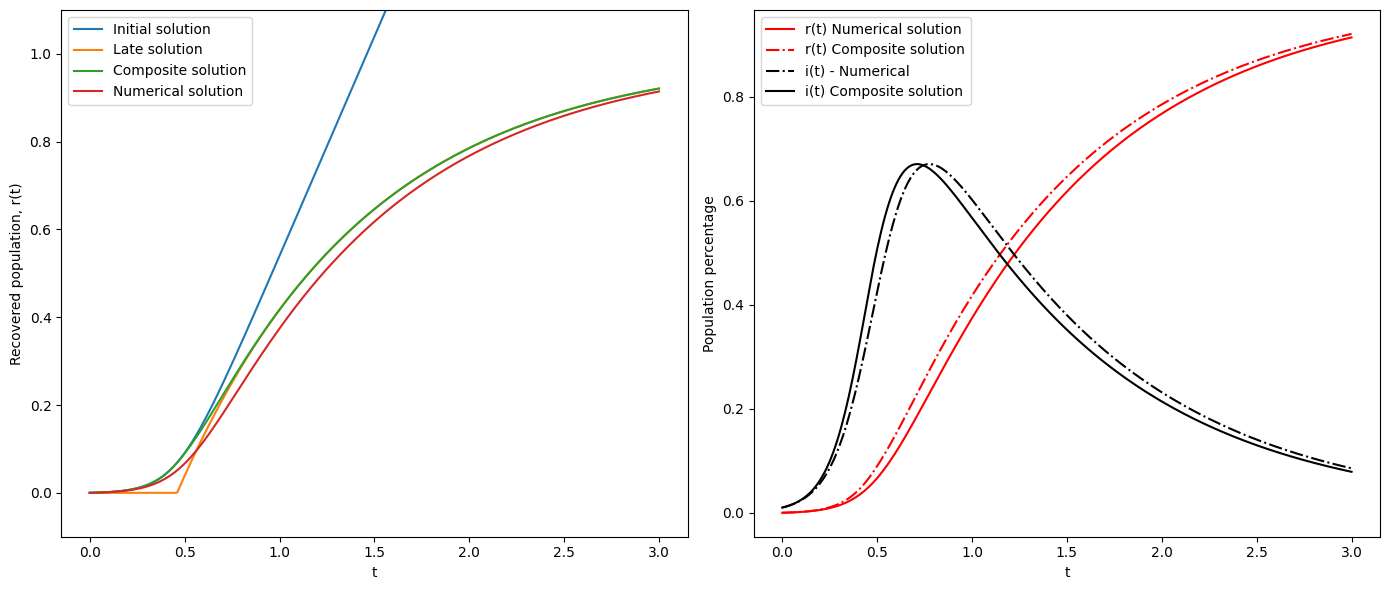

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model Parameters
g = 1  # Recovery rate - dimensionless
b = 10  # Infection rate - dimensionless
a = 0.01  # Initial percentage of population that is infected
R0 = b / g  # Reproduction number
eps = 1 / R0  # Small parameter: 1/R0



t_star = -eps * np.log(a) / g  # time at which the late time solution can be used from

# Functions
def r_late(t):
    return (1 - np.exp(-g * (t - t_star))) * (t > t_star)

def r_initial(t):
    return eps * np.log(1 - a + a * np.exp(g * t / eps))

def r_composite(t):
    return r_initial(t) + (r_late(t) - (eps * np.log(a) + g * t)) * (t > t_star)

def i(r):
    return -(1 - a) * np.exp(-R0 * r) + 1 - r

# ODE function for numerical solution
def recovered_ode(t, r):
    return g * (1 - r - (1 - a) * np.exp(-r / eps))

# Solve the ODE numerically
sol = solve_ivp(recovered_ode, [0, 3], [0], t_eval=np.linspace(0, 3, 300))

t = sol.t
r_num = sol.y[0]

# Plotting
plt.figure(figsize=(14, 6))

# Initial and late solutions
plt.subplot(1, 2, 1)
plt.plot(t, r_initial(t), label='Initial solution')
plt.plot(t, r_late(t), label='Late solution')
plt.plot(t, r_composite(t), label='Composite solution')
plt.plot(t, r_num, label='Numerical solution')
plt.ylim([-0.1, 1.1])
plt.xlabel('t')
plt.ylabel('Recovered population, r(t)')
plt.legend()


# Composite and numerical solutions
plt.subplot(1, 2, 2)
plt.plot(t, r_num, 'r', label='r(t) Numerical solution')
plt.plot(t, r_composite(t), 'r-.', label='r(t) Composite solution')
plt.plot(t, i(r_num), 'k-.', label='i(t) - Numerical')
plt.plot(t, i(r_composite(t)), 'k', label='i(t) Composite solution')
plt.xlabel('t')
plt.ylabel('Population percentage')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Error analysis

err=np.zeros(len(r))


# err= ......

# plt.plot(,e)
# plt.show